<a href="https://colab.research.google.com/github/crisspyan/imc2023-lopez/blob/main/LAB_4_ANDREW_LOPEZ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display
import IPython.display

In [122]:
def plotAudio2(sig,sr,title):
    
    # this version expects the audio file to have already been opened by librosa
    
    # Adjust the x-axis to represent time
    time=np.arange(0,sig.shape[0])/sr
    
    # Scale the y-axis to represent amplitude from -1 to 1
    excursion=max(abs(sig))
    sigNew = sig / excursion
    
    # Label the x and y axes with variables
    xlabel = 'Time (seconds)'
    ylabel = 'Amplitude'

    # Plot the signal using the x and y axis variables    
    plt.plot(time,sigNew)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

In [112]:
def plotAudioFreqDomain(sig,samplingRate,title,winSize,specType):
  spec2 = librosa.amplitude_to_db(np.abs(librosa.stft(sig,n_fft=winSize)), ref=np.max)

  # plot the second spectogram with a linear frequency scaling
  librosa.display.specshow(spec2, y_axis=specType)
  plt.colorbar(format='%+2.0f dB')
  plt.title(title)
  plt.show()

In [47]:
def additiveSynthesis(samplingRate,frequency,numHarmonics,seqHarm,ampExponent):

    # generate list of harmonics
    harmonics = np.arange(1,numHarmonics+1,seqHarm)
    
    # create a time series from 0 to 1 the inputted length    
    timeSeries = np.linspace(0, 1, samplingRate)
    
    # create a cosine wave for the fundamental    
    signal = np.cos(2.0 * np.pi * frequency * timeSeries)

    # add harmonics based on the those specified in the variable 'harmonics'
    for harm in harmonics:
        signal = signal + np.cos(2.0 * np.pi * frequency * harm * timeSeries)/harm**ampExponent     
    
    # scale the signal to between -1 and 1
    excursion=max(abs(signal))
    signal = signal / excursion
    
    # plot signal
    plt.plot(timeSeries,signal)
    plt.xlabel('Time (Sec)')
    plt.ylabel('Amplitude')
    plt.title('Additive Synthesis')
    plt.plot
        
    return signal

In [95]:
def makeWaveforms(frequency,samplingRate,numHarmonics,waveType):
  # use an if/elif/else statement to set up the parameters for the different type of
  # waveforms based on the code in additiveSynthesis.ipynb
  # call additiveSynthesis() to generate a waveform
  # return the generated waveform (signal)
  if waveType == 'sawtooth':
    seqHarm = 1
    ampExponent = 1
  elif waveType == 'square':
    seqHarm = 2
    ampExponent = 1
  elif waveType == 'triangle':
    seqHarm = 2
    ampExponent = 2
  else: 
    numHarmonics = 1
    seqHarm = 1
    ampExponent = 1

  signal = additiveSynthesis(samplingRate,frequency,numHarmonics,seqHarm,ampExponent)

  # play signal

  return signal

In [120]:
def visualizeWaveforms(frequency,samplingRate,numHarmonics,waveType):
    sig = additiveSynthesis(samplingRate,frequency,numHarmonics,seqHarm,ampExponent)
    plotAudio2(sig,samplingRate,waveType)
    plotAudioFreqDomain(sig,samplingRate,waveType,winSize,specType)

    return sig


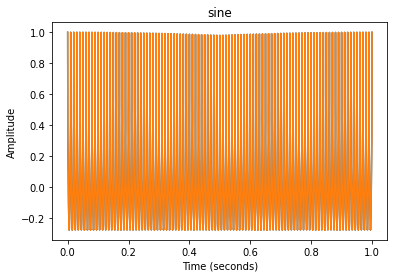

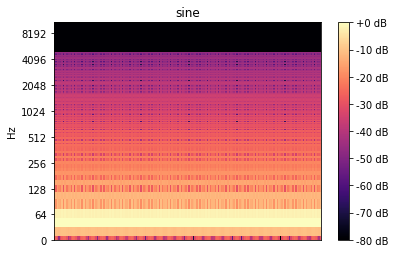

In [125]:
frequency = 100
samplingRate = 44100
numHarmonics = 100
waveType = 'sine'
winSize = 1024
specType = 'log'
sig = visualizeWaveforms(frequency,samplingRate,numHarmonics,waveType)
IPython.display.Audio(data=sig, rate=samplingRate)